# Exploration
- Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
- Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from env import get_db_url
import acquire
import prepare
from prepare import percentage_stacked_plot
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.head()

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   
3  2288172  12177905                    NaN                       NaN   
4  1970746  10887214                    1.0                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          3.5         4.0                  NaN   
1           NaN          1.0         2.0                  NaN   
2           NaN          2.0         3.0                  NaN   
3           NaN          3.0         4.0                  NaN   
4           NaN          3.0         3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1                    NaN                1.0  ...         6.111001e+13   
2                    NaN                2.0  ...         6.059022e+13   
3                    8.0                3.0  ...         6.037300e+13   
4                    8.0                3.0  ...         6.037124e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       2017-01-01                  NaN                     NaN   
1  0.055619       2017-01-01                  NaN                     NaN   
2  0.005383       2017-01-01                  NaN                     NaN   
3 -0.103410       2017-01-01                  NaN                     NaN   
4  0.006940       2017-01-01              Central                     NaN   

   buildingclassdesc  heatingorsystemdesc        propertylandusedesc  \
0                NaN                  NaN  Single Family Residential   
1                NaN                  NaN  Single Family Residential   
2                NaN                  NaN  Single Family Residential   
3                NaN              Central  Single Family Residential   
4                NaN              Central                Condominium   

   storydesc  typeconstructiondesc  
0        NaN                   NaN  
1        NaN                   NaN  
2        NaN                   NaN  
3        NaN                   NaN  
4        NaN                   NaN  

[5 rows x 68 columns]

In [4]:
import prepare

In [5]:
df = prepare.prep_zillow(df)

The following 34 columns were dropped because they were missing more    than 50.0% of data: 
['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

0 rows were dropped because they were missing more than          50.0% of data
added month of transaction, added County names, converted yearbuilt to age. 



In [6]:
df.head()

parcelid  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fips  \
28  12036177          2.0           3                          1851  6037   
44  12106936          2.0           3                          1447  6037   
67  11016518          2.0           4                          1625  6037   
70  11018202          1.0           2                           812  6037   
86  12579560          1.0           2                          1027  6037   

      latitude    longitude  lotsizesquarefeet propertycountylandusecode  \
28  34103373.0 -118293280.0               6714                      0100   
44  34166370.0 -118151336.0               7283                      0100   
67  34282275.0 -118492692.0               8427                      0100   
70  34276431.0 -118447368.0               7150                      0100   
86  33816016.0 -118271776.0               5574                      0100   

    rawcensustractandblock  ...  landtaxvaluedollarcnt  taxamount  \
28                60371892  ...                  52771       1232   
44                60374616  ...                  13021       1050   
67                60371066  ...                  42430       1307   
70                60371095  ...                  19233        668   
86                60375437  ...                  21513       1179   

    censustractandblock  logerror  transactiondate  tax_rate  age  age_bin  \
28       60371892012001  0.206470       2017-01-02  1.448815   97      NaN   
44       60374616001002  0.075156       2017-01-02  1.483994  116      NaN   
67       60371066461002 -0.060470       2017-01-02  1.346077   61      NaN   
70       60371095003018  0.021262       2017-01-02  1.639425  100      NaN   
86       60375437025006 -0.025721       2017-01-02  2.404454   66      NaN   

   transaction_month       county  
28                01  Los Angeles  
44                01  Los Angeles  
67                01  Los Angeles  
70                01  Los Angeles  
86                01  Los Angeles  

[5 rows x 24 columns]

# Explore on Train only

In [7]:
df = prepare.split_zillow_data(df)

Train: 3497 rows, 24 cols
Validate: 1500 rows, 24 cols
Test: 1250 rows, 24 cols


In [8]:
train, validate, test = df

In [9]:
train.shape

(3497, 24)

In [10]:
train.head()

parcelid  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fips  \
31129  11717042          1.0           1                           810  6037   
3021   12675745          1.0           3                          1106  6037   
7086   12575721          2.0           3                          1362  6037   
42008  12202507          2.0           3                          1280  6037   
55288  14455797          2.0           3                          1290  6059   

         latitude    longitude  lotsizesquarefeet propertycountylandusecode  \
31129  34017073.0 -118310565.0               5168                      0100   
3021   33851499.0 -118365740.0               5881                      0100   
7086   33852314.0 -118234272.0               5510                      0100   
42008  33962599.0 -118259356.0               5100                      0100   
55288  33544057.0 -117663497.0               7150                       122   

       rawcensustractandblock  ...  landtaxvaluedollarcnt  taxamount  \
31129                60372314  ...                  15717        346   
3021                 60376505  ...                  59621       1207   
7086                 60375433  ...                  13435       1194   
42008                60372398  ...                  14469        467   
55288                60590320  ...                  24400        576   

       censustractandblock  logerror  transactiondate  tax_rate  age  age_bin  \
31129       60372314001002 -0.043638       2017-04-28  1.468653   95      NaN   
3021        60376505022000  0.035143       2017-01-13  1.436272   62      NaN   
7086        60375433042000 -0.220062       2017-03-17  2.425055   53      NaN   
42008       60372398021002 -0.081519       2017-06-01  1.457235   90      NaN   
55288       60590320223032 -0.049785       2017-07-10  0.927417   47      NaN   

      transaction_month       county  
31129                04  Los Angeles  
3021                 01  Los Angeles  
7086                 03  Los Angeles  
42008                06  Los Angeles  
55288                07       Orange  

[5 rows x 24 columns]

In [11]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'tax_rate',
 'age',
 'age_bin']

parcelid


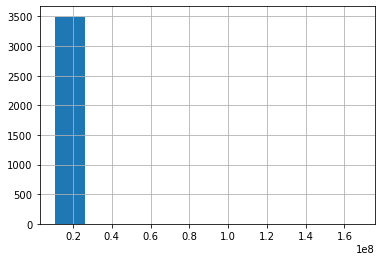

bathroomcnt


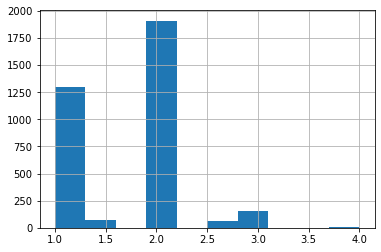

bedroomcnt


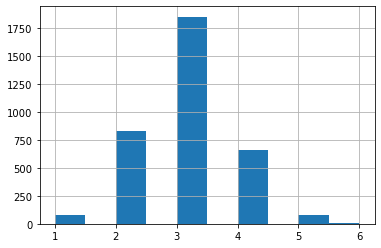

calculatedfinishedsquarefeet


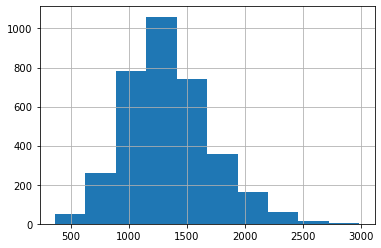

fips


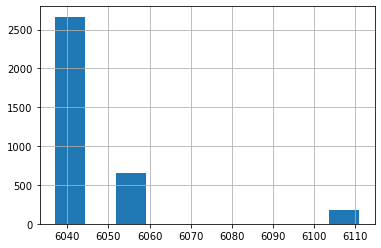

latitude


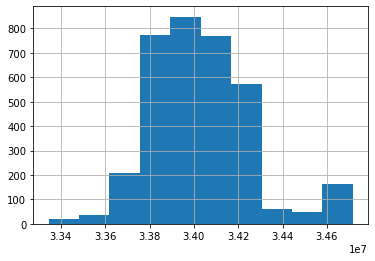

longitude


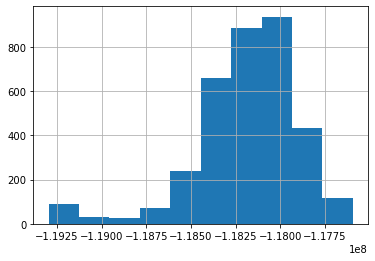

lotsizesquarefeet


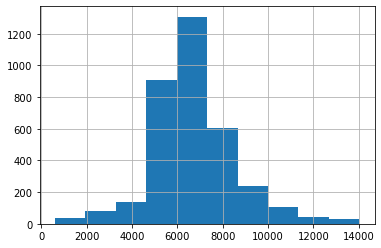

rawcensustractandblock


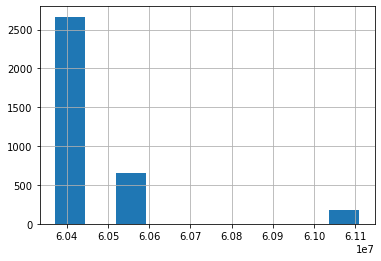

regionidcity


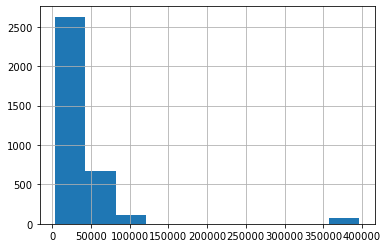

regionidzip


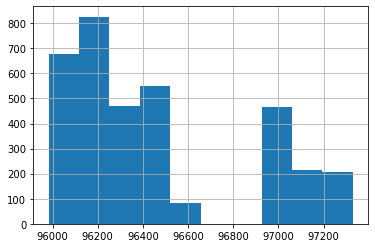

structuretaxvaluedollarcnt


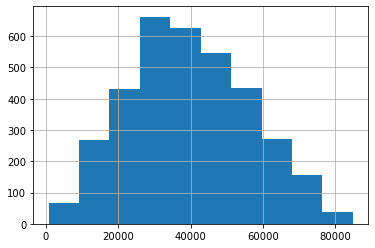

taxvaluedollarcnt


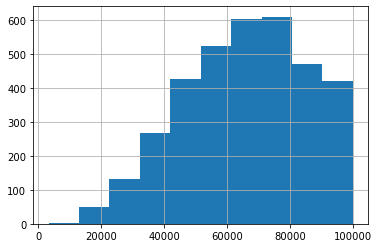

landtaxvaluedollarcnt


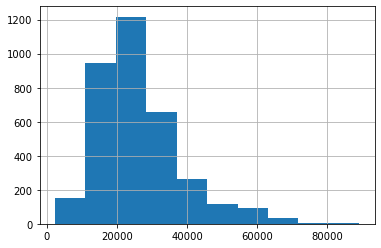

taxamount


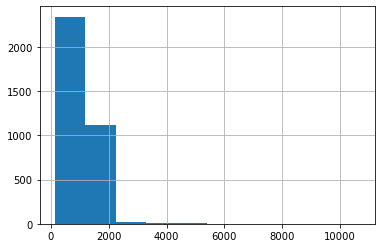

censustractandblock


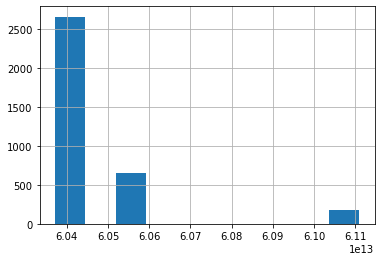

logerror


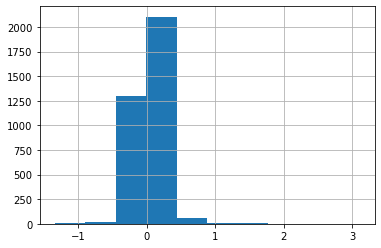

tax_rate


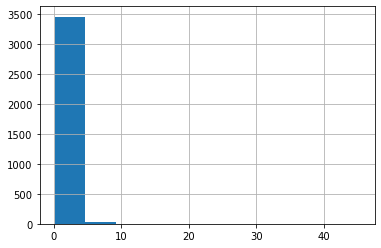

age


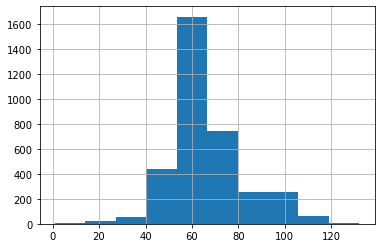

age_bin


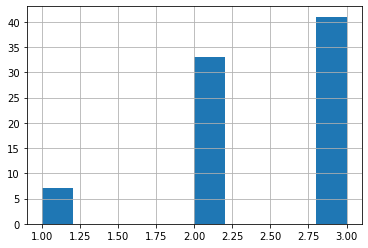

In [12]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

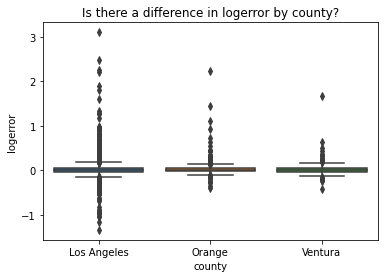

In [13]:
sns.boxplot(train.county, train.logerror)
plt.title("Is there a difference in logerror by county?")
plt.show()

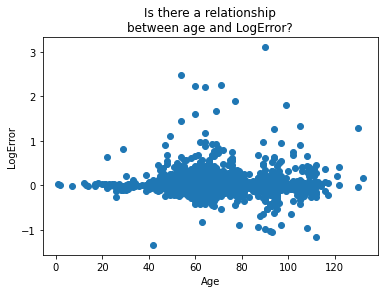

In [14]:
# plot age by logerror
plt.scatter(train.age, train.logerror)
plt.xlabel("Age")
plt.ylabel("LogError")
plt.title("Is there a relationship\nbetween age and LogError?")
plt.show()

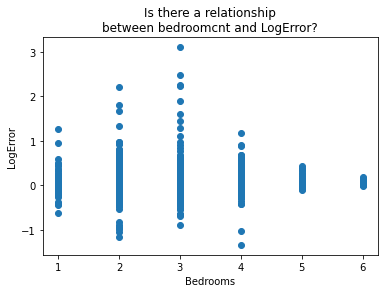

In [15]:
# plot bedroomcnt by logError
plt.scatter(train.bedroomcnt, train.logerror)
plt.xlabel("Bedrooms")
plt.ylabel("LogError")
plt.title("Is there a relationship\nbetween bedroomcnt and LogError?")
plt.show()

In [16]:
# test the assumption of equal variance

stats.levene(train[train.age <= 40].logerror, 
             train[train.age > 40].logerror
            )


LeveneResult(statistic=2.477666143203513, pvalue=0.1155639981196114)

<AxesSubplot:xlabel='transaction_month', ylabel='taxvaluedollarcnt'>

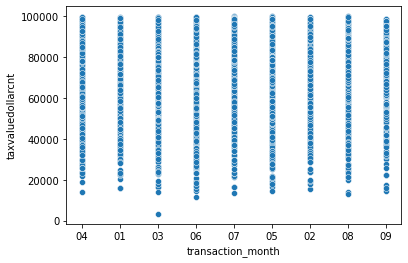

In [17]:
sns.scatterplot(x=train.transaction_month, y=train.taxvaluedollarcnt)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

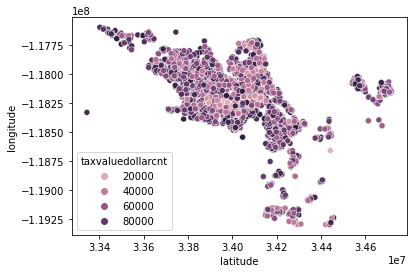

In [18]:
# Plots lats/longs by tax amount
sns.scatterplot(x=train.latitude , y=train.longitude, hue=train.taxvaluedollarcnt)

<AxesSubplot:xlabel='tax_rate', ylabel='calculatedfinishedsquarefeet'>

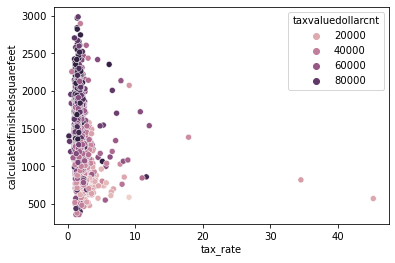

In [19]:
sns.scatterplot(x=train.tax_rate , y=train.calculatedfinishedsquarefeet, hue=train.taxvaluedollarcnt)

<AxesSubplot:xlabel='tax_rate', ylabel='age'>

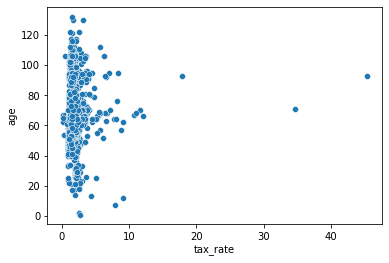

In [20]:
sns.scatterplot(x=train.tax_rate , y=train.age)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='bedroomcnt'>

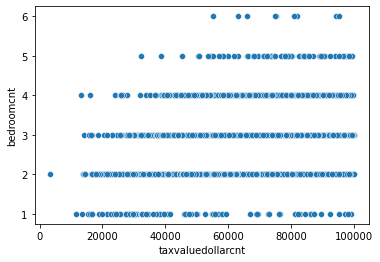

In [21]:
sns.scatterplot(x=train.taxvaluedollarcnt , y=train.bedroomcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='landtaxvaluedollarcnt'>

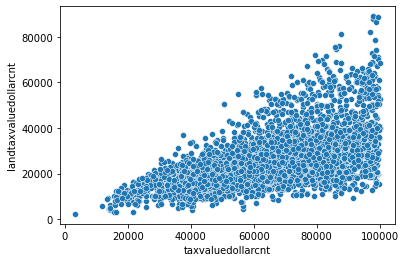

In [22]:
sns.scatterplot(x=train.taxvaluedollarcnt , y=train.landtaxvaluedollarcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='taxamount'>

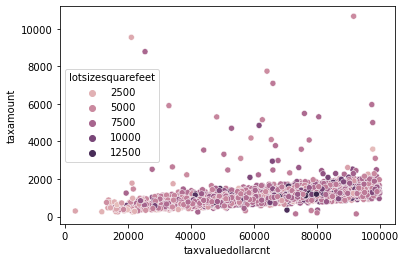

In [23]:
sns.scatterplot(x=train.taxvaluedollarcnt, y=train.taxamount, hue=train.lotsizesquarefeet)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='taxamount'>

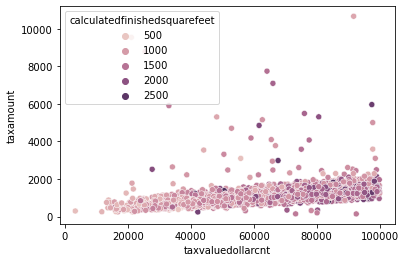

In [24]:
sns.scatterplot(x=train.taxvaluedollarcnt, y=train.taxamount, hue=train.calculatedfinishedsquarefeet)

In [25]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [26]:
train_scaled

parcelid  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
31129 -0.259474    -1.187247   -2.485576                     -1.445021   
3021  -0.018493    -1.187247    0.050770                     -0.647264   
7086  -0.043635     0.571619    0.050770                      0.042688   
42008 -0.137447     0.571619    0.050770                     -0.178312   
55288  0.428942     0.571619    0.050770                     -0.151361   
...         ...          ...         ...                           ...   
60838 -0.452625    -1.187247    0.050770                     -0.477471   
76488 -0.295200     0.571619    2.587117                      1.330958   
16607 -0.476513     0.571619   -1.217403                     -0.038166   
65599 -0.308215     0.571619    0.050770                      0.279859   
69259  0.284084    -1.187247    0.050770                     -0.792801   

           fips  latitude  longitude  lotsizesquarefeet  \
31129 -0.449694 -0.054855  -0.420038          -0.797617   
3021  -0.449694 -0.767053  -0.611828          -0.412379   
7086  -0.449694 -0.763547  -0.154841          -0.612833   
42008 -0.449694 -0.289169  -0.242034          -0.834358   
55288  0.805630 -2.089479   1.829189           0.273270   
...         ...       ...        ...                ...   
60838 -0.449694  0.685224  -0.457826          -1.607537   
76488 -0.449694 -0.066374  -0.931848           0.190063   
16607 -0.449694  0.590430  -1.076872          -0.362130   
65599 -0.449694 -0.207300  -0.773213          -0.472353   
69259  0.805630 -0.818854   0.989245           0.462377   

       rawcensustractandblock  regionidcity  regionidzip  \
31129               -0.459800     -0.405945    -1.047807   
3021                -0.435699      0.316324    -0.754649   
7086                -0.441864     -0.205589    -0.583226   
42008               -0.459317     -0.405945    -1.199355   
55288                0.793905     -0.400376     1.319819   
...                       ...           ...          ...   
60838               -0.455246      6.147988    -0.071441   
76488               -0.432720     -0.157922    -0.777008   
16607               -0.465074     -0.405945    -0.096285   
65599               -0.457259     -0.405945    -1.037870   
69259                0.797086     -0.332189     1.389382   

       structuretaxvaluedollarcnt  taxvaluedollarcnt  landtaxvaluedollarcnt  \
31129                   -1.921402          -2.159641              -0.867993   
3021                    -0.921732           0.929734               2.780629   
7086                    -0.235039          -0.847992              -1.057637   
42008                   -1.334169          -1.726051              -0.971707   
55288                   -0.120018          -0.190457              -0.146396   
...                           ...                ...                    ...   
60838                    0.239825           0.157314              -0.076422   
76488                   -0.409291           1.490825               2.987393   
16607                   -0.022487           0.728622               1.214441   
65599                    0.015089           1.405824               2.264384   
69259                   -0.170864           0.267294               0.668361   

       taxamount  censustractandblock  tax_rate       age  age_bin  \
31129  -1.482210            -0.460090 -0.247775  1.834212      NaN   
3021    0.194297            -0.435987 -0.274604 -0.282614      NaN   
7086    0.168984            -0.442153  0.544634 -0.859930      NaN   
42008  -1.246603            -0.459607 -0.257236  1.513481      NaN   
55288  -1.034362             0.793685 -0.696207 -1.244808      NaN   
...          ...                  ...       ...       ...      ...   
60838  -0.498893            -0.455535 -0.441500 -0.090175      NaN   
76488   1.206821            -0.433008  0.041250  1.000311      NaN   
16607  -1.774284            -0.465364 -1.261864 -0.090175      NaN   
65599   0.799864            -0.457548 -

In [27]:
# list of variables I will cluster on.
X = train_scaled[['taxvaluedollarcnt', 'taxamount','tax_rate']]

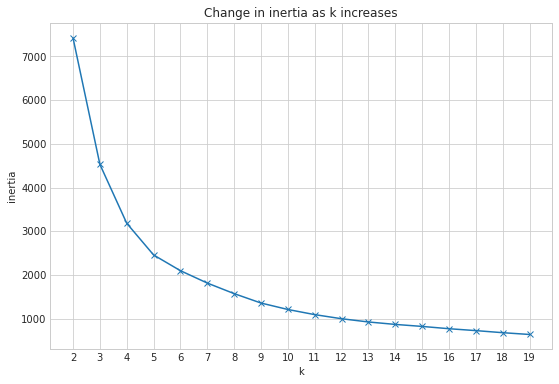

In [28]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [30]:
train_scaled['cluster_tax'] = kmeans.predict(X)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='calculatedfinishedsquarefeet'>

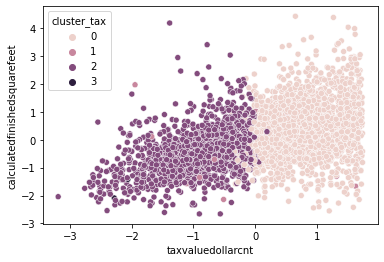

In [31]:
sns.scatterplot(x=train_scaled.taxvaluedollarcnt,y=train_scaled.calculatedfinishedsquarefeet, hue=train_scaled.cluster_tax)

In [32]:
X = train_scaled[['calculatedfinishedsquarefeet', 'lotsizesquarefeet']]


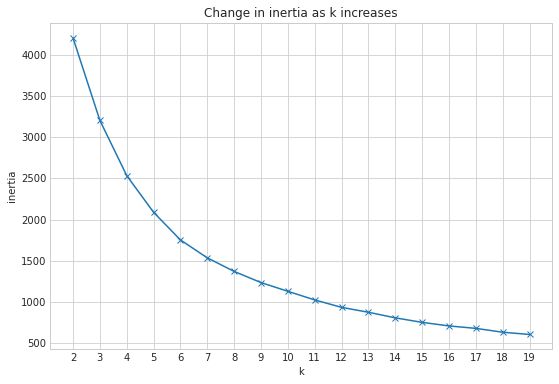

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [35]:
train_scaled['cluster_sqft'] = kmeans.predict(X)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='lotsizesquarefeet'>

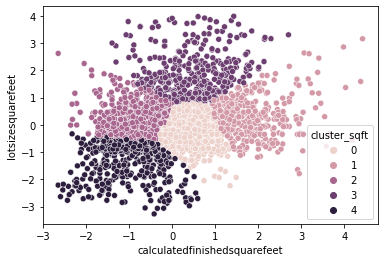

In [36]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train_scaled.lotsizesquarefeet, hue=train_scaled.cluster_sqft)

In [37]:
X = train_scaled[['bedroomcnt', 'bathroomcnt','age']]

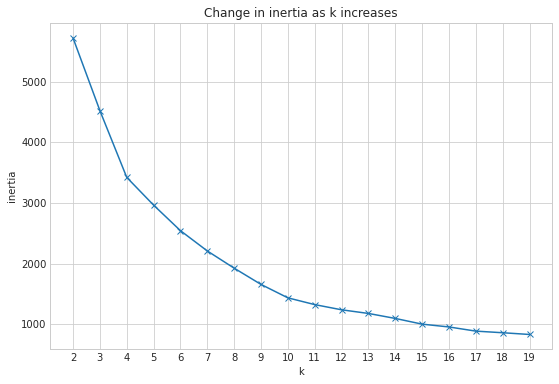

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [40]:
train_scaled['cluster_rooms'] = kmeans.predict(X)

<AxesSubplot:xlabel='bedroomcnt', ylabel='bathroomcnt'>

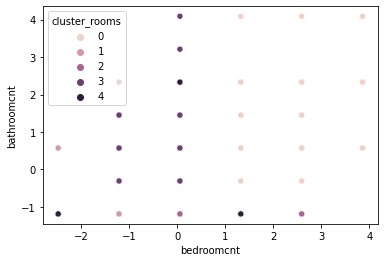

In [41]:
sns.scatterplot(x=train_scaled.bedroomcnt, y=train_scaled.bathroomcnt, hue=train_scaled.cluster_rooms)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

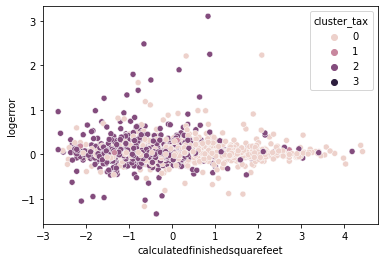

In [42]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train.logerror, hue=train_scaled.cluster_tax)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

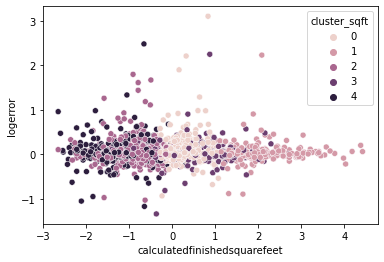

In [43]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train.logerror, hue=train_scaled.cluster_sqft)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

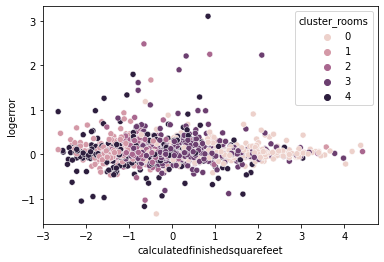

In [44]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train.logerror, hue=train_scaled.cluster_rooms)

<AxesSubplot:xlabel='tax_rate', ylabel='logerror'>

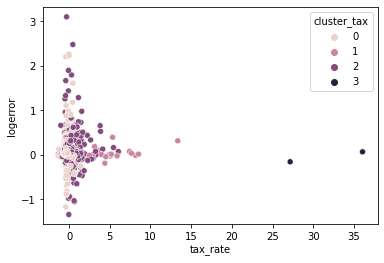

In [45]:
sns.scatterplot(x=train_scaled.tax_rate, y=train.logerror, hue=train_scaled.cluster_tax)

(-1.0, 1.0)

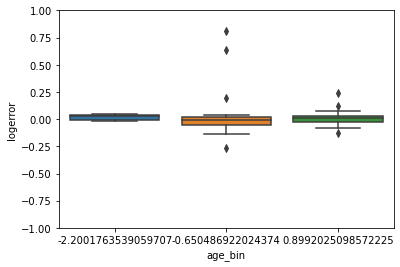

In [46]:
sns.boxplot(y=train.logerror, x=train_scaled.age_bin)
plt.ylim(-1, 1)

<AxesSubplot:xlabel='age_bin', ylabel='logerror'>

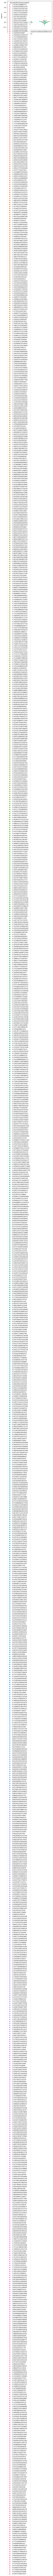

In [47]:
sns.swarmplot(train_scaled.age_bin, train.logerror, hue=train_scaled.calculatedfinishedsquarefeet)

In [58]:
train.age_bin.value_counts()

3    41
2    33
1     7
Name: age_bin, dtype: int64